In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse
import itertools
import xml.etree.ElementTree as ET

sys.path.append('../')
import utils
import settings
plt.style.use('../spectrum.mplstyle')

In [2]:
# #isosinglet nn
# files = {
# #     "Single Pivot n4 m4 d10": "isosinglet_nn_4-10",
#     "Traditional Rolling Pivot": "isosinglet_nn_4-10r",
# }

In [3]:
files = { "unrotated": os.path.join("D200_isoquartet_npi", "correlators.hdf5"),
           "rotated": os.path.join("D200_isoquartet_npi", "rotated_correlators.hdf5") }

In [4]:
corrs = []
for pivot in files.keys():
    if os.path.isdir(files[pivot]):
        hdf5_file = os.path.join(files[pivot],"rotated_correlators.hdf5")
    else:
        hdf5_file = files[pivot]
    #get all correlator data
    with h5py.File(hdf5_file,"r") as hdf5_data:
        roots = list(hdf5_data.keys())
        roots.remove("Info")
        for root in roots:
            for MCObservable in hdf5_data[root]['Values'].keys():
                MCObservableTree = ET.fromstring(MCObservable.replace("|","/"))
                corr_string = MCObservableTree.find('CorrT').text
                sink_str = corr_string.split('{')[1][:-4]
                source_str = corr_string.split('}')[1][4:]
                if sink_str not in corrs:
                    corrs.append(sink_str)
                if source_str not in corrs:
                    corrs.append(source_str)


In [5]:
corrs

['isoquartet S=0 PSQ=3 F1 D[SS0] 0',
 'isoquartet S=0 PSQ=3 F1 P[1_A2m_SS1]N[2_G_SS0] 0',
 'isoquartet S=0 PSQ=3 F1 P[2_A2m_SS0]N[1_G1_SS0] 0',
 'isoquartet S=0 PSQ=3 F2 D[SS0] 0',
 'isoquartet S=0 PSQ=3 F2 P[1_A2m_SS1]N[2_G_SS0] 0',
 'isoquartet S=0 PSQ=3 F2 P[2_A2m_SS0]N[1_G1_SS0] 0',
 'isoquartet S=0 PSQ=1 G1 D[SS0] 0',
 'isoquartet S=0 PSQ=1 G1 P[0_A1um_SS0]N[1_G1_SS0] 0',
 'isoquartet S=0 PSQ=1 G1 P[1_A2m_SS1]N[0_G1g_SS0] 0',
 'isoquartet S=0 PSQ=1 G1 P[1_A2m_SS1]N[2_G_SS0] 0',
 'isoquartet S=0 PSQ=1 G1 P[1_A2m_SS1]N[2_G_SS0] 1',
 'isoquartet S=0 PSQ=1 G1 P[2_A2m_SS0]N[1_G1_SS0] 0',
 'isoquartet S=0 PSQ=1 G1 P[2_A2m_SS0]N[1_G1_SS0] 1',
 'isoquartet S=0 PSQ=4 G1 D[SS0] 0',
 'isoquartet S=0 PSQ=4 G1 P[0_A1um_SS0]N[4_G1_SS0] 0',
 'isoquartet S=0 PSQ=4 G1 P[1_A2m_SS1]N[1_G1_SS0] 0',
 'isoquartet S=0 PSQ=4 G1 P[2_A2m_SS0]N[2_G_SS0] 0',
 'isoquartet S=0 PSQ=4 G1 P[2_A2m_SS0]N[2_G_SS0] 1',
 'isoquartet S=0 P=(0,0,0) G1g P[1_A2m_SS1]N[1_G1_SS0] 0',
 'isoquartet S=0 P=(0,0,0) G1u P[0_A1umS

In [6]:
plots = {
    r"$N\pi$_$I=3/2$_$Hg(0)$_unrotated_correlators": {
        r'$\Delta$': 'isoquartet S=0 P=(0,0,0) Hg D[SS0] 0',
        r'$\pi(1)N(1)$': 'isoquartet S=0 P=(0,0,0) Hg P[1_A2m_SS1]N[1_G1_SS0] 0',
        r'$\pi(2)N(2)_0$': 'isoquartet S=0 P=(0,0,0) Hg P[2_A2m_SS0]N[2_G_SS0] 0',
        r'$\pi(2)N(2)_1$': 'isoquartet S=0 P=(0,0,0) Hg P[2_A2m_SS0]N[2_G_SS0] 1',
    },
    r"$N\pi$_$I=3/2$_$Hg(0)$_rotated_correlators": {
        'ROT 0': 'isoquartet S=0 P=(0,0,0) Hg ROT 0',
        'ROT 1': 'isoquartet S=0 P=(0,0,0) Hg ROT 1',
        'ROT 2': 'isoquartet S=0 P=(0,0,0) Hg ROT 2',
        'ROT 3': 'isoquartet S=0 P=(0,0,0) Hg ROT 3'
    }
}

In [7]:
if not plots:
    plots = {corr: {corr:corr} for corr in corrs}

Axes(0.2,0.2;0.79x0.79)
[1, 2]


<ipython-input-10-96a34bea9206>:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fen.savefig(plot.replace('$','').replace('/','').replace('\\','')+"_energies.png", transparent=True)
<ipython-input-10-96a34bea9206>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fen.savefig(plot.replace('$','').replace('/','').replace('\\','')+"_energies.pdf", transparent=True)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


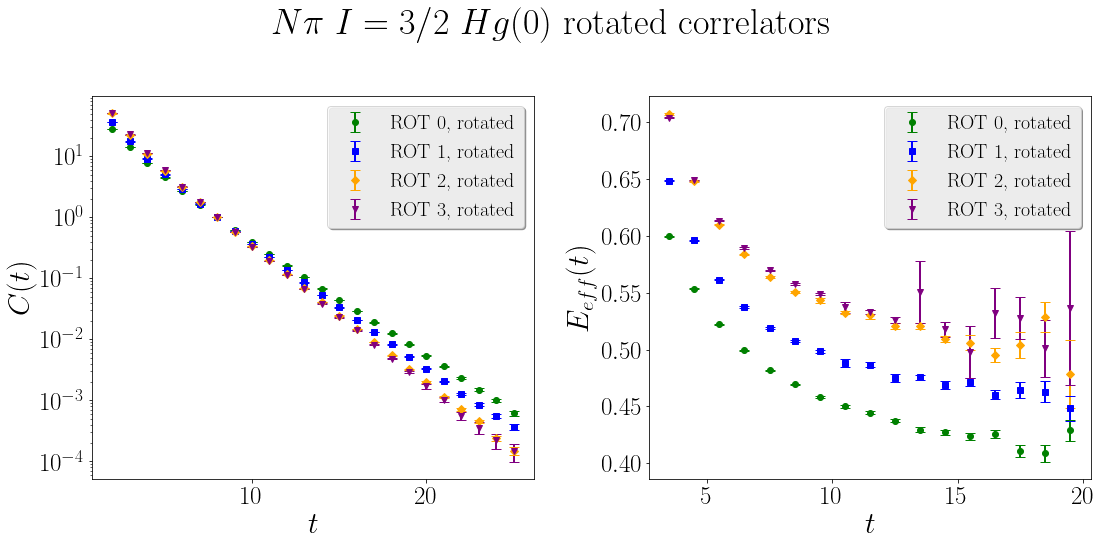

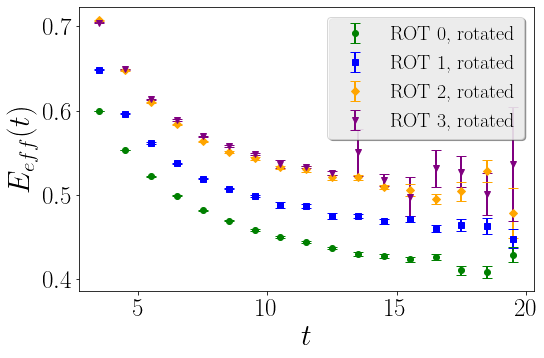

In [10]:
f, (ax1, ax2) = plt.subplots(1,2)
fen = plt.figure(num=2)
axen = fen.add_axes( (0.2,0.2,0.79,0.79) )
tmax = 20
print(axen)
print(plt.get_fignums())
for plot in plots:
    ax1.clear()
    ax2.clear()
    axen.clear()
    axen.set_autoscale_on(True)
    f.set_figwidth(16)
    f.set_figheight(8)
    fen.set_figwidth(8)
    fen.set_figheight(5)
    f.suptitle(plot.replace("_"," "))
#     fen.suptitle(plot.replace("_"," "))
    f.set_tight_layout(True)
    fen.set_tight_layout(True)
    i=0
    for corr in plots[plot]:
        for pivot in files.keys():
            if os.path.isdir(files[pivot]):
                hdf5_file = os.path.join(files[pivot],"rotated_correlators.hdf5")
            else:
                hdf5_file = files[pivot]
            #get all correlator data
            with h5py.File(hdf5_file,"r") as hdf5_data:
                roots = list(hdf5_data.keys())
                roots.remove("Info")
                for root in roots:
                    this_t, this_corr, this_err = utils.collectCorrEstimates(hdf5_data,plots[plot][corr],tag=root)
                    if plot!=plots[plot][corr]:
                        label = f"{corr}, {pivot}"
                    else:
                        label = pivot
                    if this_t:
                        ax1.errorbar( this_t, this_corr,this_err, label=label,  color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=2.0, capsize=5.0 )
                        ax1.legend()
                        ax1.set_xlabel("$t$")
                        if type(plots[plot][corr])==list:
                            ax1.set_ylabel("$R(t)$")
                        else:
                            ax1.set_ylabel("$C(t)$")
                            ax1.set_yscale("log")
                #         plt.subplot(1,2,2)
                        this_t, this_corr, this_err = utils.collectEnergyEstimates(hdf5_data,plots[plot][corr],tag=root)
                        itmax = int(tmax-this_t[0]+0.5)
                        ax2.errorbar( this_t[:itmax], this_corr[:itmax],this_err[:itmax], label=label,  color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=2.0, capsize=5.0 )
                        axen.errorbar( this_t[:itmax], this_corr[:itmax],this_err[:itmax], label=label,  color=settings.colors[i], marker=settings.markers[i], linewidth=0.0, elinewidth=2.0, capsize=5.0 )
                        
                #         this_t, this_corr, this_err = utils.collectEnergyEstimates(hdf5_data,corr,func=2)
                #         ax2.errorbar( this_t, this_corr,this_err, label=pivot+"2",  color=settings.colors[i+3], marker=settings.markers[i+3], linewidth=0.0, elinewidth=2.0, capsize=5.0 )


                #         this_t, this_corr, this_err = utils.collectEnergyEstimates(hdf5_data,corr,func=3)
                #         itmax = np.where( np.array(this_err)>this_corr[0] )[0][0]
                # #         print(itmax)
                #         ax2.errorbar( this_t[:itmax], this_corr[:itmax],this_err[:itmax], label=pivot+"2",  color=settings.colors[i+3], marker=settings.markers[i+3], linewidth=0.0, elinewidth=2.0, capsize=5.0 )

                        i+=1
                    
            ax2.legend()
            ax2.set_xlabel("$t$")
            ax2.set_ylabel("$E_{eff}(t)$")
                    
            axen.legend()
            axen.set_xlabel("$t$")
            axen.set_ylabel("$E_{eff}(t)$")
            
#     plt.tight_layout()
#     plt.savefig(plot.replace('$','').replace('/','').replace('\\','')+".png")
#     plt.savefig(plot.replace('$','').replace('/','').replace('\\','')+".pdf")
    f.savefig(plot.replace('$','').replace('/','').replace('\\','')+".png", transparent=True)
    f.savefig(plot.replace('$','').replace('/','').replace('\\','')+".pdf", transparent=True)
    fen.savefig(plot.replace('$','').replace('/','').replace('\\','')+"_energies.png", transparent=True)
    fen.savefig(plot.replace('$','').replace('/','').replace('\\','')+"_energies.pdf", transparent=True)
    